#### Importing data

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sns.set_context("talk")
sns.set_style("whitegrid")

In [31]:
df=pd.read_csv("https://raw.githubusercontent.com/MdFaisalHasan/audi_used_car_analysis/main/audi.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


#### Checking for missing values and errors

In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB


,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


#### There is no missing value or error in the dataset

#### Data aggregation and sorting based on model

In [33]:
df_agg_model = df.groupby("model")["price"].agg(["count", "mean", "sum"])
display(df_agg_model.head())

,count,mean,sum
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015


In [34]:
df_agg_model = df_agg_model.sort_values(by="count", ascending=False)
df_agg_model["percent_of_cars"] = (df_agg_model["count"]/df_agg_model["count"].sum())*100
df_agg_model["sum"] = df_agg_model["sum"]/1000000
df_agg_model = df_agg_model.round(2)

display(df_agg_model.head())

,count,mean,sum,percent_of_cars
model,,,,
A3,1929,17408.52,33.58,18.08
Q3,1417,22999.26,32.59,13.28
A4,1381,20255.45,27.97,12.95
A1,1347,14327.75,19.30,12.63
A5,882,23577.11,20.80,8.27


#### Representing Aggregated(based on model) data in barplot

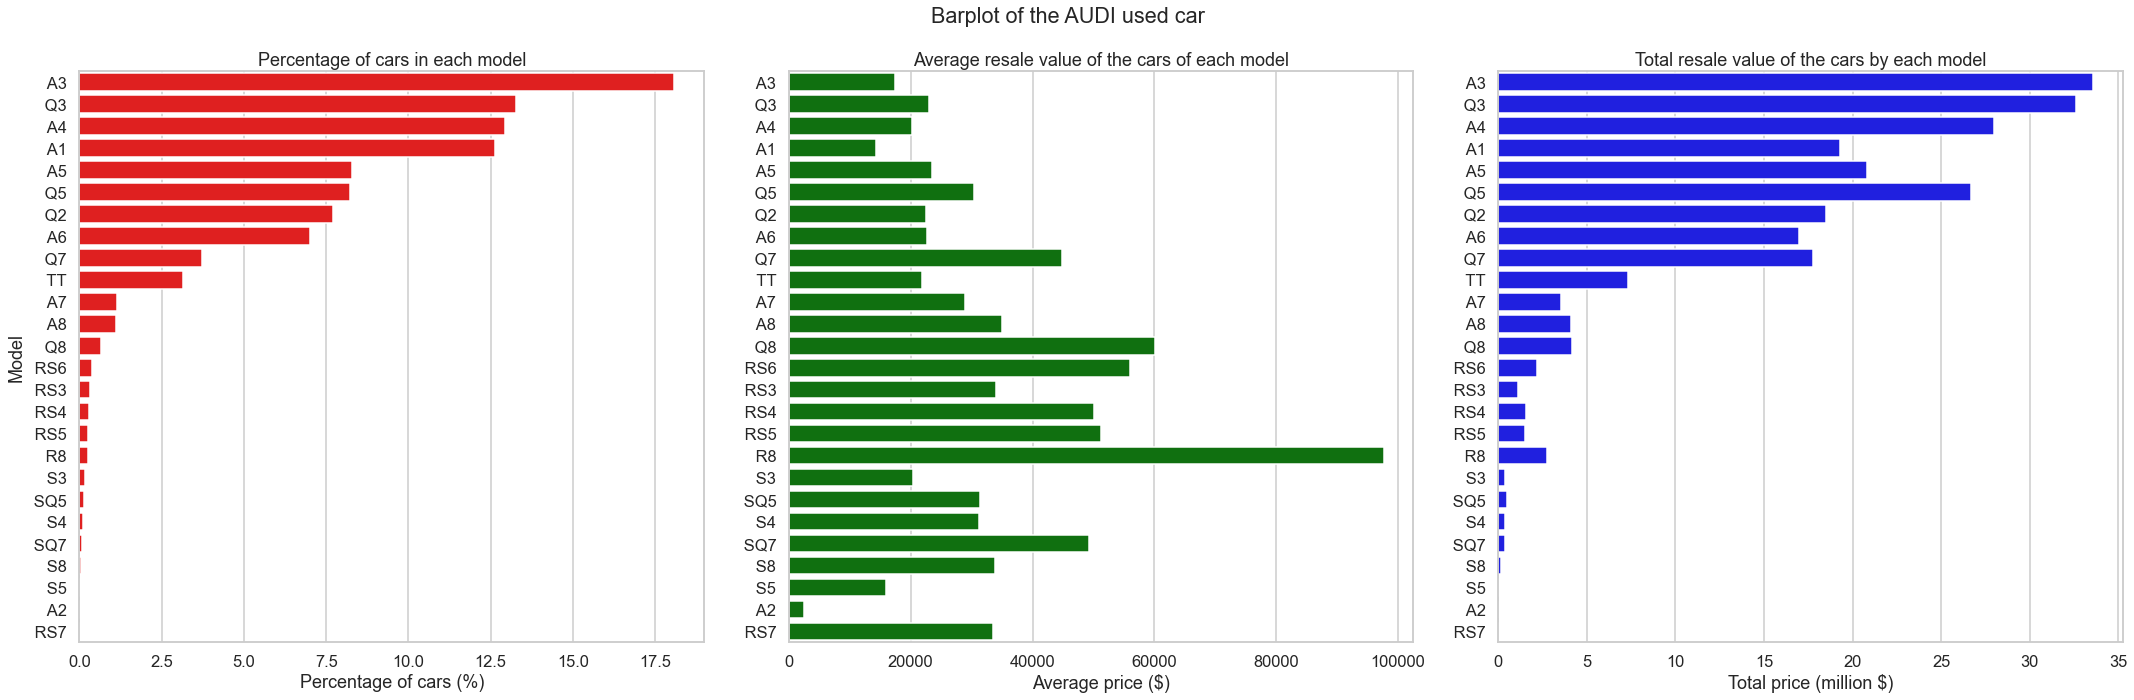

In [35]:
plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
sns.barplot(x="percent_of_cars", y=df_agg_model.index, data=df_agg_model, orient="h", color="red")
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("Model")

plt.subplot(1, 3, 2)
sns.barplot(x="mean", y=df_agg_model.index, data=df_agg_model, orient="h", color="green")
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x="sum", y=df_agg_model.index, data=df_agg_model, orient="h", color="blue")
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price (million $)")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car")
plt.tight_layout()
plt.show()

#### Data aggregation and sorting based on transmission

In [36]:
df_agg_transmission = df.groupby("transmission")["price"].agg(["count", "mean", "sum"])
display(df_agg_transmission.head())

,count,mean,sum
transmission,,,
Automatic,2708,28204.750000,76378463
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958


In [37]:
df_agg_transmission = df_agg_transmission.sort_values(by="count", ascending=False)
df_agg_transmission["percent_of_cars"] = (df_agg_transmission["count"]/df_agg_transmission["count"].sum())*100
df_agg_transmission["sum"] = df_agg_transmission["sum"]/1000000
df_agg_transmission = df_agg_transmission.round(2)

display(df_agg_transmission.head())

,count,mean,sum,percent_of_cars
transmission,,,,
Manual,4369,16101.03,70.35,40.95
Semi-Auto,3591,27161.78,97.54,33.66
Automatic,2708,28204.75,76.38,25.38


#### Representing Aggregated(based on transmission) data in barplot

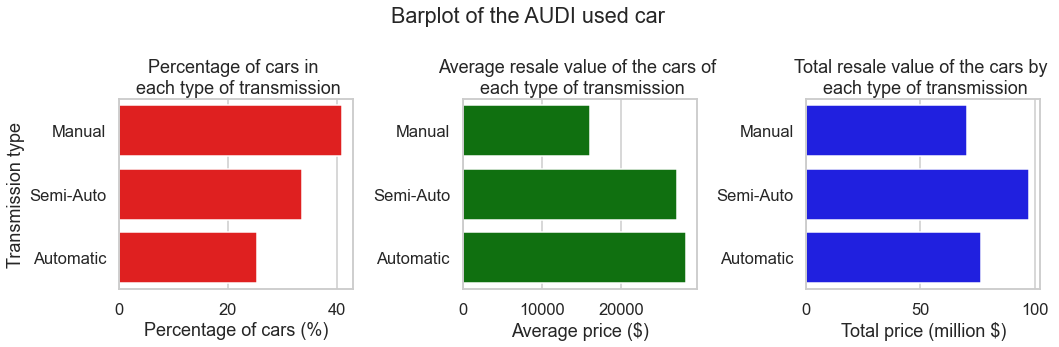

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.barplot(x="percent_of_cars", y=df_agg_transmission.index, data=df_agg_transmission, orient="h", color="red")
plt.title("Percentage of cars in \n each type of transmission")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("Transmission type")

plt.subplot(1, 3, 2)
sns.barplot(x="mean", y=df_agg_transmission.index, data=df_agg_transmission, orient="h", color="green")
plt.title("Average resale value of the cars of \n each type of transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x="sum", y=df_agg_transmission.index, data=df_agg_transmission, orient="h", color="blue")
plt.title("Total resale value of the cars by \n each type of transmission")
plt.xlabel("Total price (million $)")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car")
plt.tight_layout()
plt.show()

#### Data aggregation and sorting based on fuelType

In [39]:
df_agg_fuelType = df.groupby("fuelType")["price"].agg(["count", "mean", "sum"])
display(df_agg_fuelType.head())

,count,mean,sum
fuelType,,,
Diesel,5577,23237.516227,129595628
Hybrid,28,30191.750000,845369
Petrol,5063,22480.908355,113820839


In [40]:
df_agg_fuelType = df_agg_fuelType.sort_values(by="count", ascending=False)
df_agg_fuelType["percent_of_cars"] = (df_agg_fuelType["count"]/df_agg_fuelType["count"].sum())*100
df_agg_fuelType["sum"] = df_agg_fuelType["sum"]/1000000
df_agg_fuelType = df_agg_fuelType.round(2)

display(df_agg_fuelType.head())

,count,mean,sum,percent_of_cars
fuelType,,,,
Diesel,5577,23237.52,129.60,52.28
Petrol,5063,22480.91,113.82,47.46
Hybrid,28,30191.75,0.85,0.26


#### Representing Aggregated(based on fuelType) data in barplot

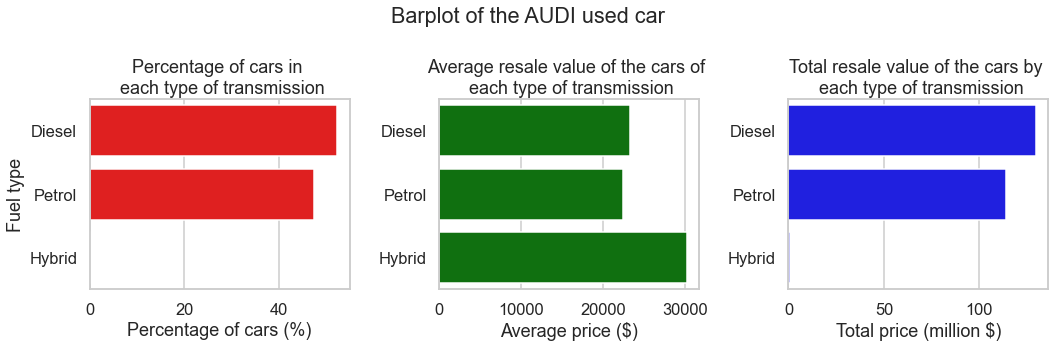

In [41]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.barplot(x="percent_of_cars", y=df_agg_fuelType.index, data=df_agg_fuelType, orient="h", color="red")
plt.title("Percentage of cars in \n each type of transmission")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("Fuel type")

plt.subplot(1, 3, 2)
sns.barplot(x="mean", y=df_agg_fuelType.index, data=df_agg_fuelType, orient="h", color="green")
plt.title("Average resale value of the cars of \n each type of transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x="sum", y=df_agg_fuelType.index, data=df_agg_fuelType, orient="h", color="blue")
plt.title("Total resale value of the cars by \n each type of transmission")
plt.xlabel("Total price (million $)")
plt.ylabel("")

plt.suptitle("Barplot of the AUDI used car")
plt.tight_layout()
plt.show()